In [2]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import RMSprop

In [45]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.90 and logs.get('accuracy')>0.90):
            print("target reached")
            self.model.stop_training = True

In [3]:

    TRAINING_DIR = "C:/Users/Mailizar Zein/Downloads/DrowsyData/Data/"
    training_datagen = ImageDataGenerator(rescale = 1./255,
                                          validation_split=0.2)

    validation_datagen = ImageDataGenerator(rescale = 1./255,
                                            validation_split=0.2)
    train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                           target_size=(224,224),
                                                           batch_size=20,
                                                           color_mode='rgb',
                                                           subset='training',
                                                           class_mode='binary')

    validation_generator = validation_datagen.flow_from_directory(TRAINING_DIR,
                                                                  target_size=(224, 224),
                                                                  batch_size=20,
                                                                  color_mode='rgb',
                                                                  subset='validation',
                                                                  class_mode='binary')



Found 7296 images belonging to 2 classes.
Found 1824 images belonging to 2 classes.


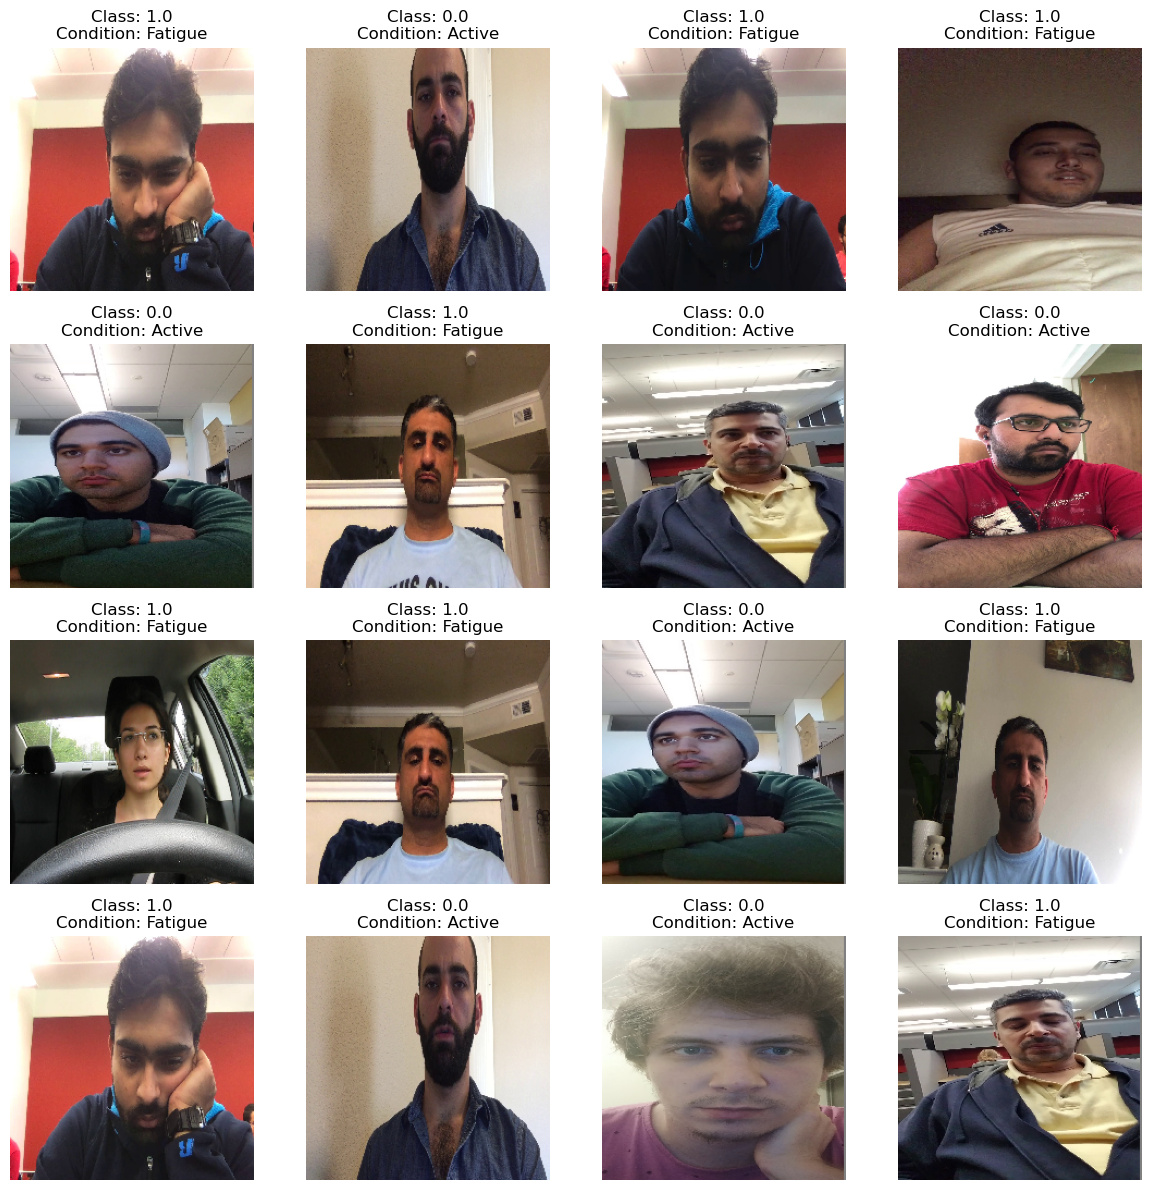

In [5]:
import matplotlib.pyplot as plt
class_indices = train_generator.class_indices
batch_images, batch_labels = train_generator.next()
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i in range(4):
    for j in range(4):
        image = batch_images[i * 4 + j]
        label_value = batch_labels[i * 4 + j]
        class_name = [class_name for class_name, value in class_indices.items() if value == label_value][0]
        original_image = image * 255.0
        axes[i, j].imshow(original_image.astype('uint8'))  
        axes[i, j].set_title(f"Class: {label_value}\nCondition: {class_name}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

In [5]:
!pip install keras


In [42]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 26, 26, 64)      

In [46]:
callback = myCallback()
history = model.fit(train_generator, validation_data=validation_generator, epochs=15, verbose=1, callbacks=callback)


Epoch 1/15
365/365 [==============================] - 351s 960ms/step - loss: 0.5493 - accuracy: 0.8006 - val_loss: 0.6710 - val_accuracy: 0.6853
Epoch 2/15
365/365 [==============================] - 368s 1s/step - loss: 0.4846 - accuracy: 0.8242 - val_loss: 0.6316 - val_accuracy: 0.7204
Epoch 3/15
365/365 [==============================] - 350s 958ms/step - loss: 0.4501 - accuracy: 0.8340 - val_loss: 0.6048 - val_accuracy: 0.7566
Epoch 4/15
365/365 [==============================] - 350s 959ms/step - loss: 0.4305 - accuracy: 0.8429 - val_loss: 0.6589 - val_accuracy: 0.7177
Epoch 5/15
365/365 [==============================] - 354s 969ms/step - loss: 0.4243 - accuracy: 0.8439 - val_loss: 0.6269 - val_accuracy: 0.7555
Epoch 6/15
365/365 [==============================] - 348s 953ms/step - loss: 0.4160 - accuracy: 0.8468 - val_loss: 0.6247 - val_accuracy: 0.7527
Epoch 7/15
365/365 [==============================] - 351s 961ms/step - loss: 0.4167 - accuracy: 0.8470 - val_loss: 0.5909 - va

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [48]:
save_directory = "C:/Users/Mailizar Zein/Downloads/DrowsyData"
save_path = os.path.join(save_directory, "drowsy_detection.h5")
os.makedirs(save_directory, exist_ok=True)

model.save(save_path)

C:\Users\Mailizar Zein\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
import cv2
image_path = "C:/Users/Mailizar Zein/Downloads/DrowsyData/image_sleep_2.jpg"
img = cv2.imread(image_path)
img = cv2.resize(img, (224, 224))
img = img / 255.0  

img = np.reshape(img, (1, 224, 224, 3))

model = tf.keras.models.load_model("C:/Users/Mailizar Zein/Downloads/DrowsyData/drowsy_detection.h5")
predictions = model.predict(img)
if predictions >0.5:
    print("Not Focus")
else:
    print("Focus")

print(predictions)



1/1 [==============================] - 1s 685ms/step
Not Focus
[[0.60149246]]


1/1 [==============================] - 0s 31ms/step


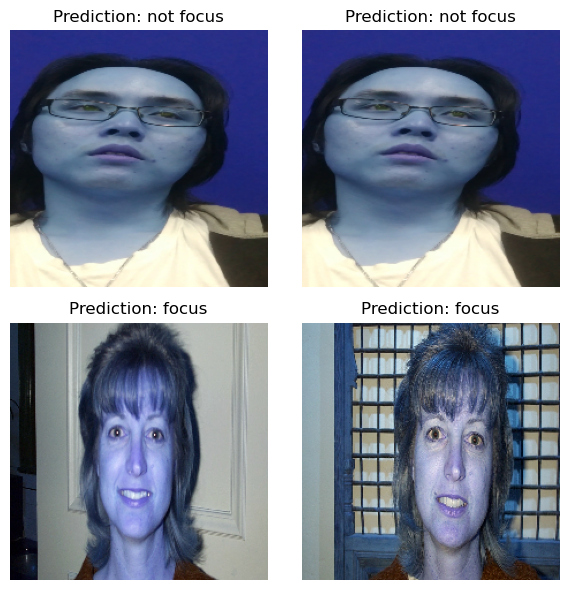

In [36]:
import random

test_folder = "C:/Users/Mailizar Zein/Downloads/DrowsyData/test"
image_paths = [os.path.join(test_folder, filename) for filename in os.listdir(test_folder) if filename.endswith(('.jpg', '.png', '.jpeg'))]
random.shuffle(image_paths)
fig, axes = plt.subplots(2, 2, figsize=(6,6))
label = "focus"

for i in range(2):
    for j in range(2):
        index = i * 2 + j
        if index < len(image_paths):
            img = cv2.imread(image_paths[index])
            img = cv2.resize(img, (224, 224))
            img = img / 255.0
            img = np.reshape(img, (1, 224, 224, 3))

            prediction = model.predict(img)
            
            if prediction >0.5:
                label = "not focus"
            else:
                label = "focus" 

            axes[i, j].imshow(img.reshape((224, 224, 3)))
            axes[i, j].set_title(f"Prediction: {label}")
            axes[i, j].axis('off')
            
plt.tight_layout()
plt.show()

In [55]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model_path = 'C:/Users/Mailizar Zein/Downloads/DrowsyData/drowsy_detection.h5'
model = load_model(model_path)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
print("model converted")
tflite_path = 'C:/Users/Mailizar Zein/Downloads/DrowsyData/drowsy_detection.tflite'
with open(tflite_path, 'wb') as f:
  f.write(tflite_model)
print("TFLite model saved at:", tflite_path)

INFO:tensorflow:Assets written to: C:\Users\MAILIZ~1\AppData\Local\Temp\tmpzo1aytyg\assets


INFO:tensorflow:Assets written to: C:\Users\MAILIZ~1\AppData\Local\Temp\tmpzo1aytyg\assets


model converted
TFLite model saved at: C:/Users/Mailizar Zein/Downloads/DrowsyData/drowsy_detection.tflite


In [59]:
img = cv2.imread('C:/Users/Mailizar Zein/Downloads/DrowsyData/face_active.jpg')
img = cv2.resize(img, (224,224))
img = np.array(img, dtype="float32")
img = np.reshape(img, (1,224,224,3))


interpreter = tf.lite.Interpreter(model_path='C:/Users/Mailizar Zein/Downloads/DrowsyData/drowsy_detection.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']

print("*"*50, input_details)
interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

************************************************** [{'name': 'serving_default_conv2d_34_input:0', 'index': 0, 'shape': array([  1, 224, 224,   3]), 'shape_signature': array([ -1, 224, 224,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[[8.104483e-33]]
